# Исследование простейших нейронных сетей с использованием Scikit-Learn

## ЧАСТЬ 1 — MLP для регрессии (датасет Boston)

### Загрузка датасета Boston

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np

data = fetch_california_housing()
X, y = data.data, data.target
X.shape, y.shape

((20640, 8), (20640,))

### Масштабирование признаков

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Обучение базовой модели MLPRegressor

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.774024017888106, 0.2961209558262307)

### Исследование влияния гиперпараметров

In [4]:
results = {}

for h in [(20,), (50,), (100,), (100,50), (100,100)]:
    model = MLPRegressor(hidden_layer_sizes=h, max_iter=2000, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results[h] = r2_score(y_test, pred)

results

{(20,): 0.7590946562959493,
 (50,): 0.774024017888106,
 (100,): 0.7715969884493712,
 (100, 50): 0.7939793375995564,
 (100, 100): 0.7964109428071252}

### Вывод

In [5]:
best_config = max(results, key=results.get)
best_config

(100, 100)

## ЧАСТЬ 2 — MLP для классификации (датасет Digits 8×8)

### Загрузка датасета Digits

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

### Визуализация одного изображения

<Figure size 640x480 with 0 Axes>

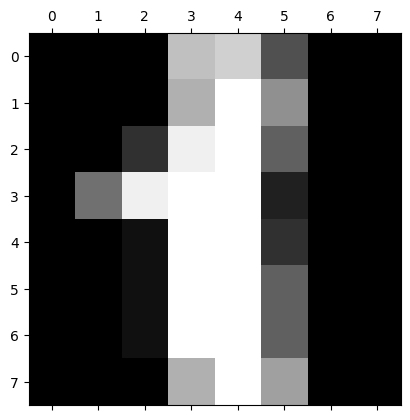

In [7]:
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits.images[1])
plt.show()

### Масштабирование признаков

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0][:10]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926])

### Обучение модели MLPClassifier

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

clf = MLPClassifier(
    hidden_layer_sizes=(80,),
    max_iter=3000,
    random_state=42
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9722222222222222

### Метрики по каждому классу

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.97      0.97      0.97        33
           3       0.97      0.94      0.96        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



---

## Вывод

Модель MLPClassifier даёт высокое качество классификации на датасете рукописных цифр. Средние значения precision, recall и f1-score находятся на уровне 0.97 - стабильная и точная работа модели для всех классов. Лучшие результаты наблюдаются у цифр 0, 4 и 7, где точность достигает 0.99–1.00, что объясняется более чётким визуальным паттерном этих изображений. Самые низкие метрики (f1 около 0.95) отмечены у класса 9, что связано с тем, что форма девятки часто визуально похожа на 4 или 7, и модель допускает редкие ошибки.

Общая точность модели составляет 0.97, что подтверждает способность MLP эффективно распознавать изображения даже при небольшой размерности входных данных (8×8 пикселей). Модель демонстрирует хорошее обобщение и корректно классифицирует практически все примеры из тестовой выборки.